<center><img src="logo_usm-1.png" width="240" height="240"/></center>

# <center> Tarea V - Optimización no lineal</center>
## <center>Estudiante: Clemente Ferrer</center>

En aplicaciones relacionadas con machine learning, se dispone de una serie de datos $\{(w_i,y_i):i\in I\}$ con los cuales nos interesa ajustar un modelo para explicar la variable $Y$ en términos de $W$, usualmente de manera lineal (i.e. $Y \sim X^{\top}W$). En general, estos problemas se pueden escribir de la forma

$$\text{Minimizar } F(x):=\sum_{i \in I} f_i(x)+\lambda \mathcal{R}(x)
\text{ sobre todos los }x \in \mathbb{R}^d.$$

donde $f_i$ representa el costo de utilizar el $i$-ésimo dato, y $R$ es una función de regularización para mantener
la simpleza del modelo. En este problema, se piden estudiar dos modelos:

$$
\textbf{Mínimos cuadrados:} \quad f_i(x)=\left(y_i-x^{\top} w_i\right)^2, \text { y } \mathcal{R} \equiv 0.
$$
$$
\textbf{Ridge:} \quad f_i(x)=\left(y_i-x^{\top} w_i\right)^2, \text { y } \mathcal{R} = \|\cdot\|_2.
$$

Se pide

1. Justificar la convexidad de estos problemas.

    <font color='blue'>Observe que $f_i$ es una función lineal en $x$, luego es convexa. Además,  el mapeo $x\mapsto x^2$ es no negativo, luego por composición de una función no negativa y una convexa deducimos que $f_i$ es convexa. Más aún, la norma también es una función convexa. Se sigue por suma de funciones convexas que $F(x)$ es convexa.</font>

2. Implementar el Método del gradiente (en el lenguaje que prefiera, de preferencia Python) descrito en clases (Apunte, pág.40). Su rutina debe considerar como entradas $Y$, $W$, $\lambda$ y debe entregar el vector de coeficientes óptimos $x^*$. El pseudo-código se describe más abajo

<center><img src="Armijo.png" /></center>

<font color='blue'> Para lo anterior, observe que $F(x)=\sum_{i=1}^{N}(y_i-x^{\top}w_i)^2+\lambda R(x)$ y por reglas de derivación $\nabla F(x)=-2W^{\top}(y-Wx)+\lambda \nabla \mathcal{R}(x)$. En particular, para $\textbf{Ridge}$ se tiene que $\nabla\|\cdot\|_2=\frac{x}{\|\cdot\|}_2$. Con esto en consideración podemos proceder a programar el código. <font>

### <font color='blue'> Librerias a usar <font> 

In [46]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

### <font color='blue'> Implementación del $\textit{Metodo del Gradiente con paso de Armijo}$ <font>

<font color='blue'> Definimos las funciones $F(x)$ Y $\nabla F(x)$ para los casos de mínimos cuadrados y Ridge. <font>

In [47]:
def F_lq(x, L, Y, W):
    return np.sum((Y- W.dot(x))**2) + L*0

def gradF_lq(x, L, Y, W):
    return -2*(W.T).dot(Y - W.dot(x)) + L*0

def F_r(x, L, Y, W):
    return np.sum((Y- W.dot(x))**2) + L*np.linalg.norm(x)

def gradF_r(x, L, Y, W):
    return -2*(W.T).dot(Y - W.dot(x)) + L*(x/np.linalg.norm(x))

<font color='blue'> Finalmente, creamos la función $\text{grad}$ con paso de Armijo para los casos de mínimos cuadrados y Ridge. <font>

In [48]:
def gradLS_armijo_step(x, Y, W, L, e, a, b, imprimir):
    iteracion = 1
    while np.linalg.norm(gradF_lq(x, L, Y, W)) >= e:
        d = -gradF_lq(x, L, Y, W)
        d_norm = np.linalg.norm(d)
        k = 0
        while True:
            if F_lq(x + (b**k)*d, L, Y, W) - F_lq(x ,L, Y, W) <=  a*(b**k)*np.sum((gradF_lq(x, L, Y, W).T).dot(d)):
                gamma = b**k
                break
            k += 1
        x = x + gamma*d
        if imprimir == "si":
            if iteracion <=10:
                print("Los coeficientes en la iteración " + str(iteracion) +" son\n"+ str(x) + "\n")
        iteracion +=1
    return  x, F_lq(x, L, Y, W)

def gradR_armijo_step(x, Y, W, L, e, a, b, imprimir):
    iteracion = 1
    while np.linalg.norm(gradF_r(x, L, Y, W)) >= e:
        d = -gradF_r(x, L, Y, W)
        d_norm = np.linalg.norm(d)
        k = 0
        while True:
            if F_r(x + (b**k)*d, L, Y, W) - F_r(x ,L, Y, W) <=  a*(b**k)*np.sum((gradF_r(x, L, Y, W).T).dot(d)):
                gamma = b**k
                break
            k += 1
        x = x + gamma*d
        if imprimir == "si":
            if iteracion <=10:
                print("Los coeficientes en la iteración " + str(iteracion) +" son\n"+ str(x) + "\n")
        iteracion +=1
    return x, F_r(x, L, Y, W)

3. (Continuación) Considere $\alpha,\beta\approx 0.8$. Considere los datos en $\texttt{data.csv}$, correspondientes a las variaciones de una superficie $y$ sometida a un sistema de fuerzas que la deforman, y una colección de variables que
representan los materiales presentes en esta superficie $x_1,\ldots, x_{15}$.

<font color='blue'> Ahora, con el objetivo de testear nuestro código, recurriremos al dataset proveniente de AULA <font>

### <font color='blue'> Función auxiliar para intercambiar columnas en un dataset <font>

In [49]:
def swap_columns(df, c1, c2):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df['temp']
    df.drop(columns=['temp'], inplace=True)
    df.rename(columns = {c1:c2, c2:c1}, inplace = True)

### <font color='blue'> Lectura y visualización de los datos <font>

In [50]:
data_path = "C:/Users/ccfer/Downloads/data1.csv"
data_csv = pd.read_csv(data_path, sep=';')

swap_columns(data_csv, "x", "y")

data_csv.head()

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


<font color='blue'> En particular el dataset posee $61$ muestras con 15 variables que determinan el output $y$. A partir de lo anterior, definiremos $Y=y\in\mathbb{R}^{61}$ y $W=(x\,\,x_2\,\,\ldots\,\, x_{15})\in\mathbb{R}^{61\times 8}$ (note que se ha tomado un subconjunto como se indicó).

<font color='blue'> $\textbf{Observación: }$Enseguida notamos una excesiva diferencia en las magnitudes de ciertas variables, lo que podría conllevar un mal condicionamiento de $W$. <font>

In [51]:
W = data_csv[data_csv.columns[1:9]].to_numpy()
Y = data_csv[["y"]].to_numpy()

<font color='blue'> Por lo visto en cursos anteriores, sabemos que $\text{Cond}(W)\approx 1$ para que la matriz del problema esté bien condicionada. Por ello procedemos a calcular dicho valor <font>

In [52]:
np.linalg.cond(W)

261678387.76611644

<font color='blue'>Por lo que para efectos pedagógicos y del curso es irrelevante trabajar con una matriz así, pues se necesitarían técnicas de precondicionamiento y regularización para disminuir el factor de condicionamiento que son vistas en cursos de análisis numérico avanzado, los cuales NO son prerrequisito de este. De todas maneras se va a continuar el análisis con estos datos, aunque se tendrá que tomar un epsilon sumamente grande para asegurar convergencia.

<font color='blue'> Por lo anterior, al final de esta tarea se incluira un anexo, haciendo uso de la biblioteca $\texttt{sklearn}$ que nos provee de datasets de la dimensión deseada con buenas propiedades de condicionamiento. Si el ayudante desea no desperdiciar parte de su tiempo corriendo estos códigos eterno, puede ir al apartado final.<font>

In [53]:
alfa = 0.8
beta = 0.8

<font color='blue'> Donde acá si podemos visualizar una matriz bien condicionada que nos permitirá realizar el método implementado de forma correcta. En particular usarmeos $\alpha=\beta=0.8$.<font>

3. Estimar los coeficientes para los dos modelos con $\lambda = 1$. Reporte las primeras $10$ iteraciones de su método y compare los coeficientes correspondientes.

<font color='blue'> En lo que resta, usaremos un vector inicial aleatorio <font>

In [54]:
x = np.random.rand(W.shape[1], 1)

In [55]:
print("Para el modelo de mínimos cuadrados se tiene que\n")
gradLS_armijo_step(x, Y, W, 10, 1000000, alfa, beta, "si")
coefs_LS = gradLS_armijo_step(x, Y, W, 10, 1000000, alfa, beta, "no")[0]
print("y los coeficientes finales son\n" + str(coefs_LS))

Para el modelo de mínimos cuadrados se tiene que

Los coeficientes en la iteración 1 son
[[0.48186776]
 [0.19642322]
 [0.42213568]
 [0.69696802]
 [0.01137437]
 [0.69484171]
 [0.73442424]
 [0.56811428]]

Los coeficientes en la iteración 2 son
[[0.4818637 ]
 [0.19640406]
 [0.4220446 ]
 [0.69653178]
 [0.0092717 ]
 [0.68465236]
 [0.68481739]
 [0.32561919]]

Los coeficientes en la iteración 3 son
[[0.48186099]
 [0.19639133]
 [0.4219841 ]
 [0.69624225]
 [0.00787724]
 [0.6778994 ]
 [0.65195938]
 [0.16507817]]

Los coeficientes en la iteración 4 son
[[0.48185919]
 [0.19638283]
 [0.42194384]
 [0.69604985]
 [0.00695166]
 [0.67342151]
 [0.63018999]
 [0.05879506]]

Los coeficientes en la iteración 5 son
[[ 0.48185797]
 [ 0.19637716]
 [ 0.42191698]
 [ 0.69592175]
 [ 0.0063365 ]
 [ 0.67044984]
 [ 0.61576184]
 [-0.01156645]]

Los coeficientes en la iteración 6 son
[[ 0.48185715]
 [ 0.19637334]
 [ 0.421899  ]
 [ 0.69583623]
 [ 0.00592685]
 [ 0.66847537]
 [ 0.60619399]
 [-0.05814596]]

Los coeficientes

In [56]:
print("Para el modelo Ridge se tiene que\n")
gradR_armijo_step(x, Y, W, 10, 1000000, alfa, beta, "si")
coefs_R = gradR_armijo_step(x, Y, W, 10, 1000000, alfa, beta, "no")[0]
print("y los coeficientes finales son\n" + str(coefs_R))

Para el modelo Ridge se tiene que

Los coeficientes en la iteración 1 son
[[0.48186776]
 [0.19642322]
 [0.42213568]
 [0.69696802]
 [0.01137437]
 [0.69484171]
 [0.73442424]
 [0.56811428]]

Los coeficientes en la iteración 2 son
[[0.4818637 ]
 [0.19640406]
 [0.4220446 ]
 [0.69653178]
 [0.0092717 ]
 [0.68465236]
 [0.68481739]
 [0.32561919]]

Los coeficientes en la iteración 3 son
[[0.48186099]
 [0.19639133]
 [0.4219841 ]
 [0.69624225]
 [0.00787724]
 [0.6778994 ]
 [0.65195938]
 [0.16507817]]

Los coeficientes en la iteración 4 son
[[0.48185919]
 [0.19638283]
 [0.42194384]
 [0.69604985]
 [0.00695166]
 [0.67342151]
 [0.63018999]
 [0.05879506]]

Los coeficientes en la iteración 5 son
[[ 0.48185797]
 [ 0.19637716]
 [ 0.42191698]
 [ 0.69592175]
 [ 0.0063365 ]
 [ 0.67044984]
 [ 0.61576184]
 [-0.01156645]]

Los coeficientes en la iteración 6 son
[[ 0.48185715]
 [ 0.19637334]
 [ 0.421899  ]
 [ 0.69583623]
 [ 0.00592685]
 [ 0.66847537]
 [ 0.60619399]
 [-0.05814596]]

Los coeficientes en la iteració

<font color='blue'> Para compararlos, usaremos el error en norma entre ambos $\|x_{LS}-x_{\text{Ridge}}\|$ y esperaremos que sea cercano a cero, pues de esta manera, ambos métodos arrojarían valores similares <font>

In [57]:
np.linalg.norm(coefs_LS-coefs_R)

1.1891512976310071e-07

<font color='blue'> Por lo anterior, concluimos que los valores son cercanos y similares entre si. <font>

4. Estimar la regresión Ridge con parámetros $\lambda\in \{0,01; 0,1; 1; 10; 1000\}$. Comparar las soluciones
obtenidas y realizar un gráfico que muestre la diferencia en magnitud de los coeficientes $x$.

In [58]:
lista_coefs = []
lista_funcion = []
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lista_funcion.append(gradR_armijo_step(x, Y, W, i, 1000000, alfa, beta, "no")[1])
    lista_coefs.append(np.linalg.norm(gradR_armijo_step(x, Y, W, i, 1000000, alfa, beta, "no")[0]))

In [59]:
lista_coefs 

[1.0091249919158911,
 1.0091249908456557,
 1.009124980143293,
 1.0091248731196825,
 1.0091238028835543,
 1.009113100522241]

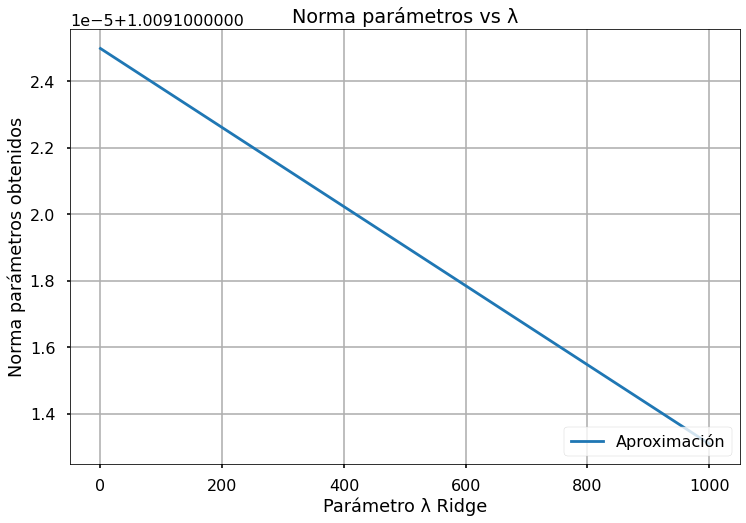

In [60]:
plt.figure(figsize = (12, 8))
plt.plot(lambdas, lista_coefs, label='Aproximación')
plt.title('Norma parámetros vs λ')
plt.xlabel('Parámetro λ Ridge')
plt.ylabel('Norma parámetros obtenidos')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# ANEXO - Códigos optimizados para revisión

In [61]:
from sklearn import datasets

W, Y = datasets.make_regression(1140,15) #Crearemos un dataset con las dimensiones originales!
Y = Y.reshape((-1,1))

np.linalg.cond(W)

1.2118336977935213

Enseguida se puede verificar que el factor de condiconamiento es cercano a $1$.

In [62]:
x = np.random.rand(W.shape[1], 1) #Vector aleatorio

Modelo mínimos cuadrados.

In [63]:
print("Para el modelo de mínimos cuadrados se tiene que\n")
gradLS_armijo_step(x, Y, W, 10, 100, alfa, beta, "si") #Epsilon incluso más pequeño!
coefs_LS = gradLS_armijo_step(x, Y, W, 10, 100, alfa, beta, "no")[0]
print("y los coeficientes finales son\n" + str(coefs_LS))

Para el modelo de mínimos cuadrados se tiene que

Los coeficientes en la iteración 1 son
[[-1.11832851]
 [-0.47988609]
 [27.39739678]
 [ 9.02842684]
 [ 4.235656  ]
 [17.50696208]
 [33.51249721]
 [11.30553228]
 [27.3337586 ]
 [ 0.36387547]
 [ 1.84298424]
 [-0.13382681]
 [ 2.67547169]
 [ 2.09951701]
 [12.37648818]]

Los coeficientes en la iteración 2 son
[[-9.95414139e-01]
 [-7.29171586e-01]
 [ 4.30061221e+01]
 [ 1.41663598e+01]
 [ 7.33563191e+00]
 [ 2.86795764e+01]
 [ 5.43858673e+01]
 [ 1.79962327e+01]
 [ 4.52157517e+01]
 [ 3.77854784e-02]
 [ 1.94537046e+00]
 [-4.74899521e-01]
 [ 2.98564192e+00]
 [ 3.13081990e+00]
 [ 1.95297560e+01]]

Los coeficientes en la iteración 3 son
[[-0.23141926]
 [-0.66942317]
 [52.22117912]
 [17.0861271 ]
 [ 9.59403329]
 [35.83615525]
 [67.561772  ]
 [22.12985433]
 [57.22723622]
 [-0.11467604]
 [ 1.62703296]
 [-0.55684367]
 [ 2.62797227]
 [ 3.71476089]
 [24.05692047]]

Los coeficientes en la iteración 4 son
[[ 0.65364207]
 [-0.52208654]
 [57.67788161]
 [18.728

Modelo Ridge

In [64]:
print("Para el modelo Ridge se tiene que\n")
gradR_armijo_step(x, Y, W, 10, 100, alfa, beta, "si")
coefs_R = gradR_armijo_step(x, Y, W, 10, 1000, alfa, beta, "no")[0]
print("y los coeficientes finales son\n" + str(coefs_R))

Para el modelo Ridge se tiene que

Los coeficientes en la iteración 1 son
[[-1.11872602]
 [-0.4803003 ]
 [27.39678296]
 [ 9.02838979]
 [ 4.2354622 ]
 [17.50692346]
 [33.51236568]
 [11.30523655]
 [27.33315986]
 [ 0.36317396]
 [ 1.84261811]
 [-0.13436213]
 [ 2.67504087]
 [ 2.09930213]
 [12.37585088]]

Los coeficientes en la iteración 2 son
[[-9.95666300e-01]
 [-7.29412485e-01]
 [ 4.30049542e+01]
 [ 1.41661135e+01]
 [ 7.33537908e+00]
 [ 2.86790537e+01]
 [ 5.43848001e+01]
 [ 1.79957297e+01]
 [ 4.52145815e+01]
 [ 3.73601811e-02]
 [ 1.94510381e+00]
 [-4.75230306e-01]
 [ 2.98531490e+00]
 [ 3.13063620e+00]
 [ 1.95289788e+01]]

Los coeficientes en la iteración 3 son
[[-0.23161653]
 [-0.66957047]
 [52.21971164]
 [17.08575895]
 [ 9.59372146]
 [35.83531272]
 [67.56011873]
 [22.12922638]
 [57.22565218]
 [-0.11493074]
 [ 1.62686144]
 [-0.55704969]
 [ 2.62775434]
 [ 3.71460111]
 [24.05607064]]

Los coeficientes en la iteración 4 son
[[ 0.65345348]
 [-0.52218528]
 [57.67625641]
 [18.72844105]
 [11.167

Comparación en norma de los coeficientes obtenidos vía ambos métodos.

In [65]:
np.linalg.norm(coefs_LS-coefs_R)

0.370072273530684

Realización del método Ridge con distintos valores de $\lambda$

In [66]:
lista_coefs = []
lista_funcion = []
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lista_funcion.append(gradR_armijo_step(x, Y, W, i, 100, alfa, beta, "no")[1])
    lista_coefs.append(np.linalg.norm(gradR_armijo_step(x, Y, W, i, 100, alfa, beta, "no")[0]))

In [67]:
lista_coefs 

[155.3638999908808,
 155.36385846714214,
 155.36344322977143,
 155.3592908576842,
 155.31776729877913,
 154.9025479142499]

Gráfica comparativa entre $\lambda$ y la norma de los parámetros obtenidos.

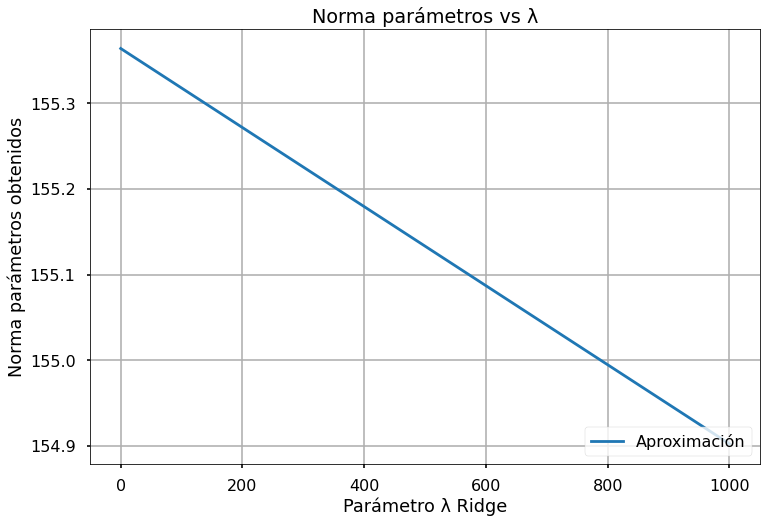

In [68]:
plt.figure(figsize = (12, 8))
plt.plot(lambdas, lista_coefs, label='Aproximación')
plt.title('Norma parámetros vs λ')
plt.xlabel('Parámetro λ Ridge')
plt.ylabel('Norma parámetros obtenidos')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Con el objetivo de corroborar el código programado, podemos comparar los valores de $x$ obtenidos con la función de mínimos cuadrados $\texttt{lstsq}$ que la libreria $\texttt{numpy}$ ya trae implementada

In [69]:
alpha = np.linalg.lstsq(W, Y, rcond=None)[0]
print(alpha)

[[ 3.86444037e+00]
 [ 0.00000000e+00]
 [ 6.57044208e+01]
 [ 2.05875335e+01]
 [ 1.41653525e+01]
 [ 4.86070281e+01]
 [ 9.11918049e+01]
 [ 2.90161562e+01]
 [ 8.11907075e+01]
 [ 1.77635684e-14]
 [ 7.10542736e-15]
 [ 3.01980663e-14]
 [-3.90798505e-14]
 [ 4.31092859e+00]
 [ 3.25453171e+01]]


In [70]:
np.linalg.norm(coefs_LS-alpha)

0.03520065601134562

Notamos que estos son sumamente cercanos a los que obtuvimos con la implementación del método del gradiente con paso de Armijo.